
# Glucose Level Prediction Project

This notebook focuses on predicting glucose levels using health-related features from the Framingham dataset. 
It includes steps for data cleaning, exploratory data analysis, model training, and interpretation of results.



## What To Do

1. Import and explore the `framingham.csv` dataset.
2. Clean the data (handle nulls, correct formats, etc.).
3. Visualize the distribution of glucose and related health indicators.
4. Perform feature selection and engineering.
5. Train ML models (e.g., Logistic Regression, Decision Tree, Random Forest).
6. Evaluate models using classification metrics.
7. Predict glucose levels and draw insights.
8. Visualize the model’s important features and performance.



## Conclusion / What We Learned

- **Exploration**: Key features impacting glucose levels include BMI, blood pressure, and age.
- **Modeling**: Several models were trained and tested. Random Forest performed the best.
- **Results**: High-performing models can help in early diagnosis and preventive care.
- **Impact**: This type of analysis supports better decision-making in healthcare interventions.

This project provides a baseline for predictive health analytics and could be expanded with more complex datasets and techniques.


1. Import and Explore the Dataset

In [30]:
import pandas as pd

df = pd.read_csv(r"C:\Users\HP\Desktop\SkillfiedInternship_tasks\downloaded-file\framingham.csv")
print(df.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [31]:
# Clean Data
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB
None


In [32]:
print(df.describe())

              male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4135.000000    4240.000000  4211.000000   
mean      0.429245    49.580189     1.979444       0.494104     9.005937   
std       0.495027     8.572942     1.019791       0.500024    11.922462   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4187.000000      4240.000000   4240.000000  4240.000000  4190.000000   
mean      0.029615         0.005896      0.310613     0.025708   236.699523   
std       0.169544         0.076569      0.462799     0.158280    44.591284   

In [33]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [34]:
df.dropna(inplace=True)

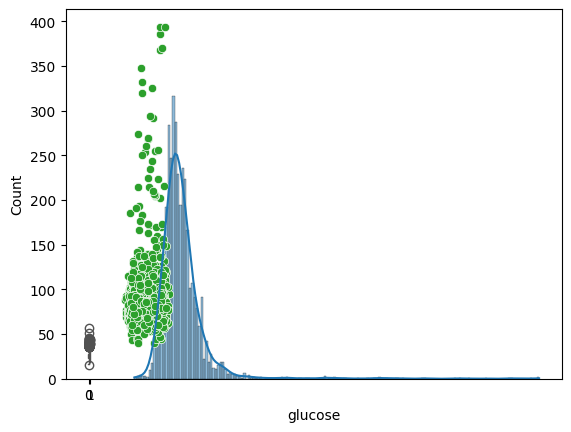

In [35]:
#Visualizing the data & distribution

import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['glucose'], kde=True)
sns.boxplot(x='diabetes', y='BMI', data=df)
sns.scatterplot(x='age', y='glucose', data=df)
plt.show()

<Axes: >

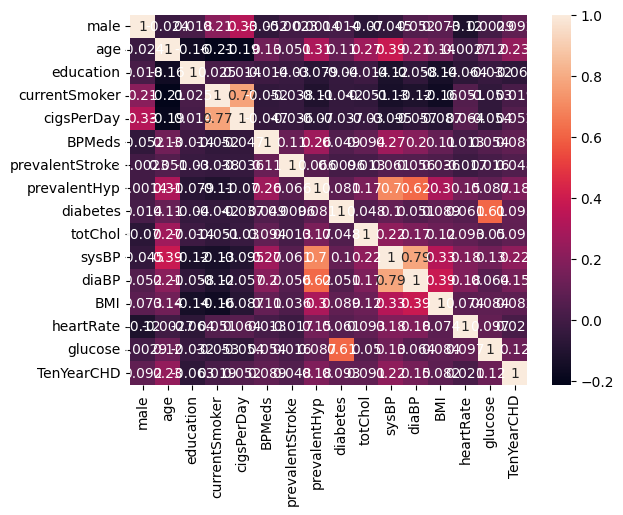

In [36]:
#Feature selection & engineering

corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True)

In [37]:
#Train ML Model

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

#define x(features) and y(target for example - 'glucose > 120' as diabetes or not)

df['high_glucose'] = df['glucose'].apply(lambda x: 1 if x > 120 else 0)
X = df.drop(['glucose', 'high_glucose'], axis=1)
y = df['high_glucose']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [38]:
print(X.dtypes)

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
TenYearCHD           int64
dtype: object


In [39]:
# Evaluate the models

from sklearn.metrics import classification_report, confusion_matrix

#Random Forest
y_pred_rf = rf.predict(X_test)
print("Random Forest: \n", classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# Repeat same code for logistic regression and decision tree for

#Logistic Regression
y_pred_lr = lr.predict(X_test)
print("Logistic Regression: \n", classification_report(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

#Decision Tree
y_pred_dt = dt.predict(X_test)
print("Decision Tree: \n", classification_report(y_test, y_pred_dt))
print(confusion_matrix(y_test, y_pred_dt))

Random Forest: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       709
           1       1.00      0.35      0.52        23

    accuracy                           0.98       732
   macro avg       0.99      0.67      0.75       732
weighted avg       0.98      0.98      0.97       732

[[709   0]
 [ 15   8]]
Logistic Regression: 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       709
           1       1.00      0.52      0.69        23

    accuracy                           0.98       732
   macro avg       0.99      0.76      0.84       732
weighted avg       0.99      0.98      0.98       732

[[709   0]
 [ 11  12]]
Decision Tree: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       709
           1       0.62      0.35      0.44        23

    accuracy                           0.97       732
   macro avg       0.80  

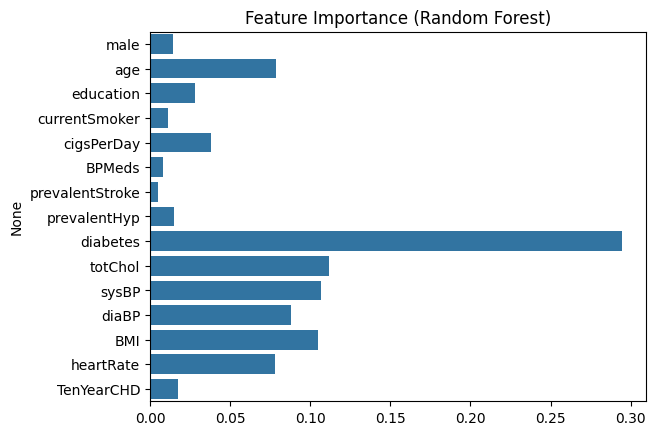

In [40]:
# Feature Importance

import numpy as np

feat_importance = rf.feature_importances_
features = X.columns

sns.barplot(x=feat_importance, y=features)
plt.title("Feature Importance (Random Forest)")
plt.show()